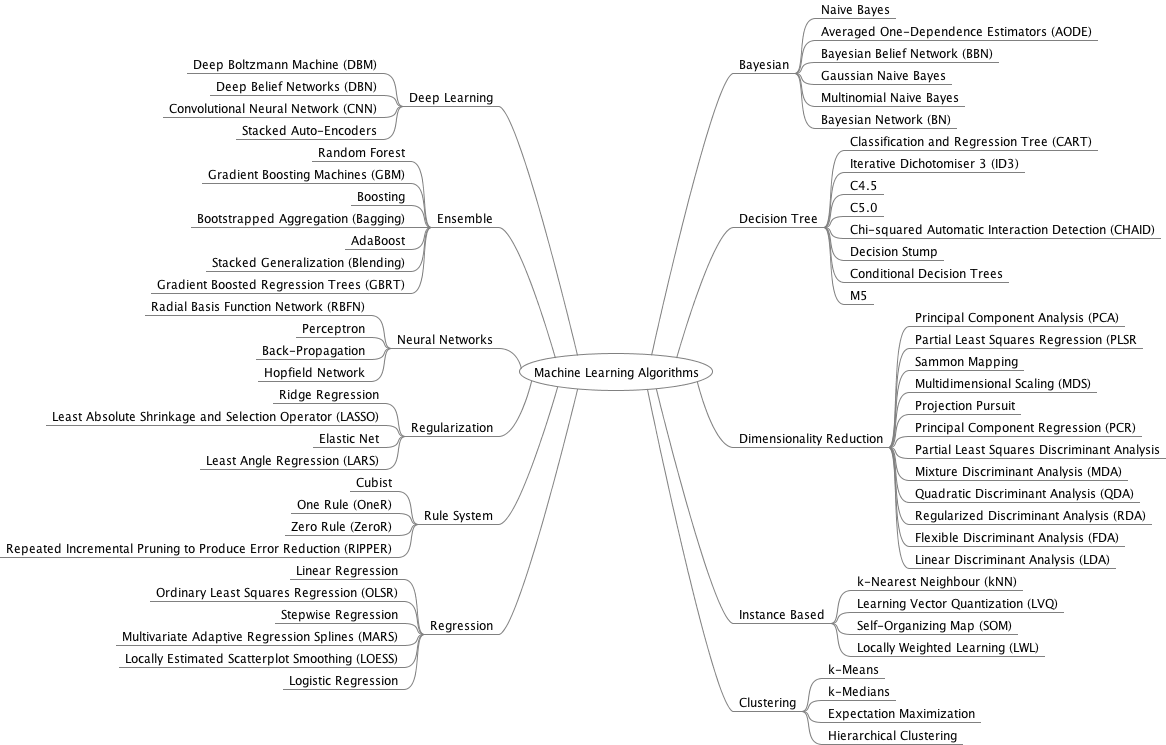

# AdaBoost 
http://bit.ly/1QrsJV4

Short for "Adaptive Boosting", is a machine learning meta-algorithm formulated by **Yoav Freund** and **Robert Schapire** _who won the Gödel Prize in 2003 for their work_. It can be used in conjunction with many other types of learning algorithms to improve their performance

> The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier

+ AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers
+ It is sensitive to noisy data and outliers
+ In some problems it can be less susceptible to the overfitting problem than other learning algorithms
+ The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing (e.g., their error rate is smaller than 0.5 for binary classification), the final model can be proven to converge to a strong learner

> V.G.: http://bit.ly/24IqoPl
another: http://bit.ly/2uYPiOu
and a video: http://bit.ly/2vQ4TkH

### The devil is in the details
This diagram aptly explains Ada-boost.

Let’s understand it closely:
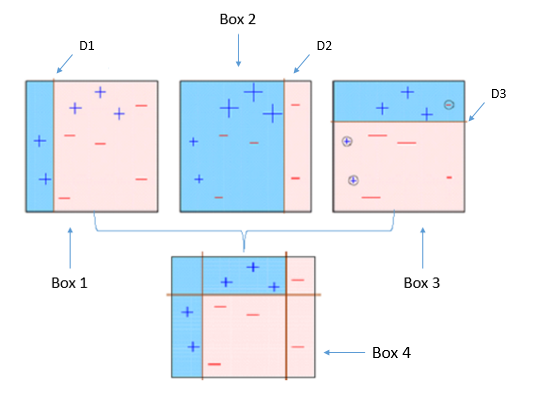

**Box 1**: You can see that we have assigned equal weights to each data point and applied a decision stump to classify them as + (plus) or – (minus). The decision stump (D1) has generated vertical line at left side to classify the data points. We see that, this vertical line has incorrectly predicted three + (plus) as – (minus). In such case, we’ll assign higher weights to these three + (plus) and apply another decision stump.
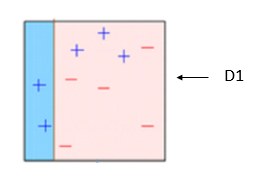

**Box 2**: Here, you can see that the size of three incorrectly predicted + (plus) is bigger as compared to rest of the data points. In this case, the second decision stump (D2) will try to predict them correctly. Now, a vertical line (D2) at right side of this box has classified three mis-classified + (plus) correctly. But again, it has caused mis-classification errors. This time with three -(minus). Again, we will assign higher weight to three – (minus) and apply another decision stump.
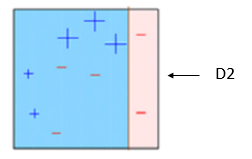

**Box 3**: Here, three – (minus) are given higher weights. A decision stump (D3) is applied to predict these mis-classified observation correctly. This time a horizontal line is generated to classify + (plus) and – (minus) based on higher weight of mis-classified observation.
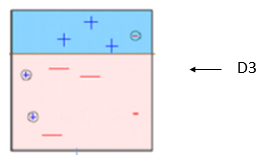

**Box 4**: Here, we have combined D1, D2 and D3 to form a strong prediction having complex rule as compared to individual weak learner. You can see that this algorithm has classified these observation quite well as compared to any of individual weak learner.
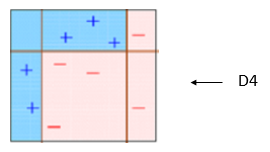

**AdaBoost** (_Adaptive Boosting_) : It works on similar method as discussed above. It fits a sequence of weak learners on different weighted training data. It starts by predicting original data set and gives equal weight to each observation. If prediction is incorrect using the first learner, then it gives higher weight to observation which have been predicted incorrectly. Being an iterative process, it continues to add learner(s) until a limit is reached in the number of models or accuracy.

Mostly, we use decision stamps with AdaBoost. But, we can use any machine learning algorithms as base learner if it accepts weight on training data set. We can use AdaBoost algorithms for both classification and regression problem.

http://bit.ly/2idnmom

## Python Code
```
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
# Above I have used decision tree as a base estimator
# You can use any ML learner as base estimator if it accepts sample weight 
clf.fit(x_train,y_train)
```
You can tune the parameters to optimize the performance of algorithms, I’ve mentioned below the key parameters for tuning:

+ **n_estimators**: It controls the number of weak learners
+ **learning_rate**:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators
+ **base_estimators**: It helps to specify different ML algorithm

> You can also tune the parameters of base learners to optimize its performance.

 

**Step 1** : Visualize the data : Let’s first understand the data and find insights on whether we have a linear classifier boundary. As shown below, no such boundary exist which can separate 0’s from 1’s.
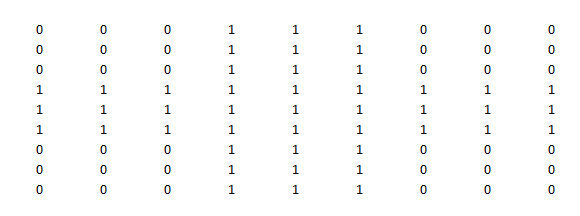

**Step 2** : Make the first Decision stump : You have already read about decision trees in many of our previous articles. Decision stump is a unit depth tree which decides just 1 most significant cut on features. Here it chooses draw the boundary starting from the third row from top. Now the yellow portion is expected to be all 0’s and unshaded portion to be all 1’s. However, we see high number of false positive post we build this decision stump. We have nine 1’s being wrongly qualified as 0’s. And similarly eighteen 0’s qualified as 1’s.
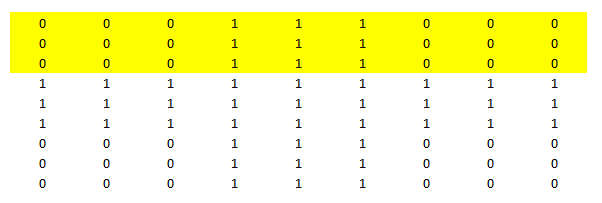

**Step 3** : Give additional weight to mis-classified observations: Once we know the misclassified observations, we give additional weight to these observations. Hence, you see 0’s and 1’s in bold which were misclassified before. In the next level, we will make sure that these highly weighted observation are classified correct
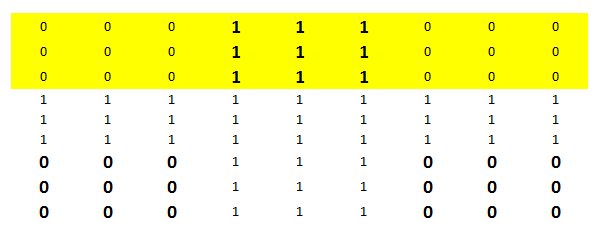

**Step 4** : Repeat the process and combine all stumps to get final classifier : We repeat the process multiple times and focus more on previously misclassified observations. Finally, we take a weighted mean of all the boudaries discovered which will look something as below.
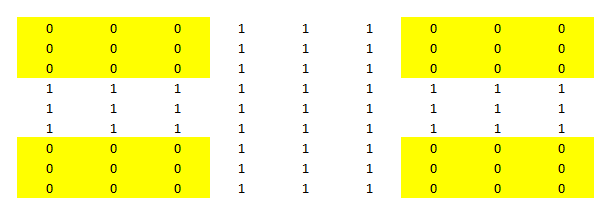        

In [16]:
from sklearn.ensemble import AdaBoostClassifier #For Classification
from sklearn.ensemble import AdaBoostRegressor #For Regression
from sklearn.tree import DecisionTreeClassifier
#+ **n_estimators**: It controls the number of weak learners
#+ **learning_rate**:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators
#+ **base_estimators**: It helps to specify different ML algorithm
dt = DecisionTreeClassifier(max_depth=1,min_samples_split=40) 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)


In [17]:
import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

In [18]:
features_train, labels_train, features_test, labels_test = makeTerrainData()

In [19]:
### the training data (features_train, labels_train) have both: "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]
### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
clf.fit(features_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=40, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

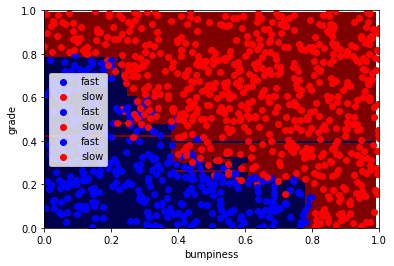

In [10]:
#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################

In [20]:
try:
    print('Picture...')
    prettyPicture(clf, features_test, labels_test)
except NameError:
    print('Passing')
    pass

Picture...
